In [1]:
import matplotlib.pyplot as plt
qty = 1000
input_values = list(range(0, qty + 1))
squares = list(value**2 for value in range(0, qty + 1))
plt.plot(input_values, squares, linewidth=1)
plt.axis([0, qty, 0, squares[qty-1]])
plt.title("Square Numbers", fontsize=18)
plt.xlabel("Value", fontsize=14)
plt.ylabel("Square of Value", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

<Figure size 640x480 with 1 Axes>

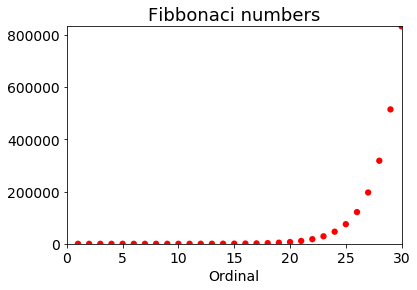

In [2]:
def fibbonaci_list(qty):
    if qty == 0:
        return []
    if qty == 1:
        return [1]
    if qty == 2:
        return [ 1, 1]
    fibb_list = [1, 1];
    n = 2
    while n < qty:
        fibb_list.append(fibb_list[n-1] + fibb_list[n-2])
        n += 1
    return fibb_list

qty = 30
fibbonacies = fibbonaci_list(qty)
x_values = list(range(1, qty + 1))
y_values = fibbonacies
plt.scatter(x_values, y_values, c = 'red', edgecolor='none', s=40)
plt.axis([0, qty, 0, y_values[qty-1]])
plt.title("Fibbonaci numbers", fontsize=18)
plt.xlabel("Ordinal", fontsize=14)
plt.tick_params(axis='both', labelsize = 14)
plt.show()

In [3]:
from random import choice

class RandomWalk():
    """A class to generate random walk"""
    
    def __init__(self, num_points = 5000):
        """Initialize attributes of walk."""
        self.num_points = num_points
        self.x_values = [0]
        self.y_values = [0]
    
    def get_step(self):
        direction = choice([-1, 1])
        distance = choice(range(0,5))
        return direction * distance
        
    def fill_walk(self):
        """Calculate all the points in the walk."""
        while len(self.x_values) < self.num_points: 
            x_step = self.get_step()
            y_step = self.get_step()
            
            # Reject moves that go nowhere.
            if x_step == 0 and y_step == 0:
                continue 
                
            next_x = self.x_values[-1] + x_step
            next_y = self.y_values[-1] + y_step
            self.x_values.append(next_x)
            self.y_values.append(next_y)
    

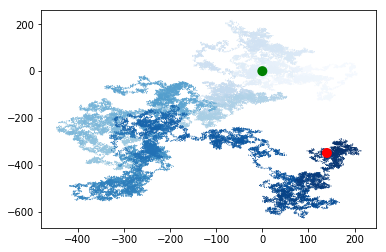

<Figure size 1280x768 with 0 Axes>

In [4]:
steps_qty = 50000
rw = RandomWalk(steps_qty)
rw.fill_walk()

point_numbers = list(range(rw.num_points))
plt.scatter(rw.x_values, rw.y_values, c=point_numbers,
            cmap=plt.cm.Blues, edgecolors='none', s= 1)
# Emphasize the first and last points.
plt.scatter(0, 0, c='green', edgecolors='none', s=100)
plt.scatter(rw.x_values[-1], rw.y_values[-1], c='red', 
            edgecolors='none', s=100)
plt.figure(dpi=128, figsize=(10, 6))
plt.show()

In [5]:
from random import randint

class Die():
    """A class representing a single die."""
    
    def __init__(self, size = 6):
        self.size = size
        
    def roll(self):
        return randint(1, self.size)

In [6]:
import pygal

die = Die()
results = []

for roll_num in range(1200):
    result = die.roll()
    results.append(result)

frequencies = []
for value in range(1, die.size + 1):
    frequency = results.count(value)
    frequencies.append(frequency)
    
# Visualize the results.
hist = pygal.Bar()
hist.title = "Results of rolling one D6 1200 times."
hist.x_labels = ['1', '2', '3', '4', '5', '6']
hist.x_title = "Result"
hist.y_title = "Frequency of Result"
hist.add('D6', frequencies)
hist.render_to_file('die_visual.svg')

In [8]:
num_of_dice = 4
num_of_rolls = 1200000

dice = []
for val in range(1, num_of_dice + 1):
    die = Die()
    dice.append(die)

results = []
for roll_num in range(num_of_rolls):
    result = 0
    for die in dice:
        result += die.roll()
    results.append(result)

max_result = 0
for die in dice: 
    max_result += die.size

frequencies = []
for value in range(num_of_dice, max_result + 1):
    frequency = results.count(value)
    frequencies.append(frequency)   

hist = pygal.Bar()
hist.title = "Results of rolling " + str(num_of_dice) + " D6 " + str(num_of_rolls) + " times."
hist.x_labels = list(range(num_of_dice, max_result + 1))
hist.x_title = "Result"
hist.y_title = "Frequency of Result"
hist.add('D12', frequencies)
hist.render_to_file(str(num_of_dice) + 'dice_visual.svg')